# 2.- Setup

In this tutorial we'll learn how to prepare our data before performing the simulations. The main idea is to create Planetary System objects, based on individual Planets. In this tutorial (and the forthcoming) we will use a synthetic planetary systems with two planets described in the Introduction.

## Example: Solving a two-planet system

Let's import the Nauyaca, given the alias: nau

In [1]:
import nauyaca as nau

## 2.1 The Planet object

First, let's define the Planet objects and their attributes. These planets will be part of the planetary system that we want to analyze. We create a Planet just by giving a planet name. Let's assume that the **first** planet in our system is named simply "Planet-b". Then, we create it as follows:

In [2]:
Planetb = nau.SetPlanet("Planet-b")

Nice! it was so easy. What can we do now? Well, since we want to fit the mid-transit times of our planet, let's give the transit data.

### 2.1.1 Transit times data

There are two ways of giving the mid-transit time observations to the Planet object. 

**1.-** The first one is by explicity giving a dictionary of the ephemerids to the attribute -ttvs_data-, in the following format:

In [3]:
Planetb.ttvs_data = {0: [1.942086, 0.000264, 0.000264],
                     1: [7.296529, 0.000264, 0.000264],
                     2: [12.654044, 0.000264, 0.000264],
                     #... more data
                    }

where the keys are the transit epochs (integer numbers) and the values are lists containing, for each epoch, the central transit time and the lower and upper errors, in days.

**2.-** The second one, is by using the .load_ttvs method. When using this way, the ephemeris should be in an ascci file containing the transit epochs, the central transit times and the lower and upper errors, as before.

For example, a file containing these data looks like:

In [4]:
! head -8  ./inputs/planetb_ttvs.dat

#Transit  t_c           lower_err      upper_err
#Number  (days)          (days)          (days) 
0	1.942086	0.000264	0.000264
1	7.296529	0.000264	0.000264
2	12.654044	0.000264	0.000264
3	18.010832	0.000264	0.000264
4	23.366389	0.000264	0.000264
5	28.721868	0.000264	0.000264


**Note:** the transit epochs must always start from 0 at least for one planet. It means that epochs must be labeled from 0 (first transit) at a reference epoch.

Thus, for ease we will use the second way. Hence, we load the transit data as follows:

In [5]:
# Note that the data are in the -inputs- subdirectory
Planetb.load_ttvs("./inputs/planetb_ttvs.dat") 

To ensure that the data are loaded, let's see it through:

In [6]:
Planetb.ttvs_data

{0: [1.942086, 0.000264, 0.000264],
 1: [7.296529, 0.000264, 0.000264],
 2: [12.654044, 0.000264, 0.000264],
 3: [18.010832, 0.000264, 0.000264],
 4: [23.366389, 0.000264, 0.000264],
 5: [28.721868, 0.000264, 0.000264],
 6: [34.076444, 0.000264, 0.000264],
 7: [39.431166, 0.000264, 0.000264],
 8: [44.785746, 0.000264, 0.000264],
 9: [50.139754, 0.000264, 0.000264],
 10: [55.494422, 0.000264, 0.000264],
 11: [60.85012, 0.000264, 0.000264],
 12: [66.205291, 0.000264, 0.000264],
 13: [71.562914, 0.000264, 0.000264],
 14: [76.919358, 0.000264, 0.000264],
 15: [82.274283, 0.000264, 0.000264],
 16: [87.629856, 0.000264, 0.000264],
 17: [92.984414, 0.000264, 0.000264],
 18: [98.338861, 0.000264, 0.000264],
 19: [103.693764, 0.000264, 0.000264],
 20: [109.048144, 0.000264, 0.000264],
 21: [114.40272, 0.000264, 0.000264],
 22: [119.759243, 0.000264, 0.000264],
 23: [125.114832, 0.000264, 0.000264],
 24: [130.471868, 0.000264, 0.000264],
 25: [135.827753, 0.000264, 0.000264],
 26: [141.183208, 0

Fine! at this point we have a Planet with transit data. Now, we will see how to say to Nauyaca where to look in the parameter space of our planet...

### 2.1.2 Setting the parameter space

For a planet, we have 7 parameters (and the required units) that Nauyaca will explore:

* Mass    -----  [M_Earth]
* Period  ----- [days]
* Eccentricity
* Inclination  ----- [deg]
* Argument of periastron  ----- [deg]
* Mean anomaly  ----- [deg]
* Ascending node  ----- [deg]


Now, in order to avoid exploring in a non-physical region of the parameter space or with redundant information, it is necessary to establish especific boundaries for each planetary parameter. These boundaries will be used in the subsequent analysis. 

**Default boundaries:** In many cases nothing is known about one or more parameters. In that case a set of $default$ boundaries will be established. Let's see which are these default boundaries by calling the physical limits established inside the module -constants- in Nauyaca:

In [7]:
nau.constants.physical_bounds

{'mass': (0.0123032, 25426.27252757),
 'period': (0.1, 1000.0),
 'ecc': (1e-06, 0.9),
 'inclination': (0.0, 180.0),
 'argument': (0.0, 360),
 'mean_anomaly': (0.0, 360),
 'ascending_node': (0.0, 360.0)}

By default the mass is ranged from a lunar mass up to 80 Jupiter masses (units above are in Earth masses). Angles are restricted bewteen 0° and 360° except for the inclination which is defined between 0° and 180°. These default boundaries arise if nothing is known about the planet. In practice we can restrict the parameter space from previous knowledge coming, for example, from light curve analysis. 

To restrict any planetary parameter, we should give a range [minimum, maximum]. Those parameters that we do not restrict manually will have the default limits mentioned above.

For our example, let's suppose that we know a rough estimation of the period and the inclination. It is true because we can approximate the period from consecutive transit times, and also we know that the planet transits, so the inclination should be around ~90°! Let's also suppose that we want to explore the mass range from a Earth planet up to 50 Earth masses. Finally, let's the eccentricity to vary up to 0.2, because greater values would result in unstable orbits.

Thus, to make these restrictions, we write:

In [8]:
                                      #     LIMITS FOR:
Planetb.mass = [1, 50.]               # Planet mass [Mearth]
Planetb.period = [5.35, 5.36]         # Orbital period [days]
Planetb.ecc = [0., 0.2]               # eccentricity. Look at the lower limit!
Planetb.inclination = [90, 90]        # Assuming edge-on orbit [deg]

print(Planetb)  # print a summary of our Planet object


 =========== Planet Summary =========== 
--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06
Planet : Planet-b
  Boundaries:
    mass: (1, 50.0)  [M_earth]
    period: (5.35, 5.36)  [d]
    ecc: (1e-06, 0.2)   
    inclination: (90, 90)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (0.0, 360.0)  [deg]
  TTVs: True


From here, we can notice of two things:

**1.-** There is a dialog from Nauyaca (starting with -->) saying to us that the lower boundary of eccentricity have been set to 1e-06. Why is that? It is because we manually set the eccentricity lower limit to 0, but this value is lower than the *default* lower limit in eccentricity mentioned previously: 1e-06. Thus, Nauyaca prevents of giving boundaries manually outside the default physical boundaries, which by design, have been thought to consider almost any kind of planets and orbits. In this case, the lower limit in eccentricity is small but different from zero in order to avoid getting undefined argument of periastron.

A similar thing would happens, for example, if we set a negative lower limit in masses (which have not physical sense). In this case, the negative limit will be changed to 0.0123032 [M_earth], which corresponds to a Lunar mass.


**2.-** We did not establish boundaries for argument of periastron, mean anomaly or ascending node, and thus the default boundaries arise.



**Constant parameters** 

To keep a planetary parameter constant, set the lower and upper boundaries as equal, just as the inclination for Planetb!

By construction in the coordinate system, **the ascending node of at least one planet in the system must be fixed**.
Let's keep fixed this angle to the correct ascending node of "Planet-b" (true values can be seen in the file /inputs/true_solution), by setting equal values in the lower and upper boundaries:

In [9]:
Planetb.ascending_node = [88.36, 88.36]  # Ascending node [deg]

By doing this, we say to Nauyaca that ascending node of "Planet-b" will not be part of the parameter space explored by the Optimizers or MCMC.

Great! that's all we need to define the parameter space of a planet. Let's do the same for the second planet.
Let's create another planet object and do the same as before:

In [10]:
# Planet-c
Planetc = nau.SetPlanet("Planet-c")

# Load transit times
Planetc.load_ttvs("./inputs/planetc_ttvs.dat")

# Set boundaries
Planetc.mass = [1, 50]           # Let's exploree up to 50 Earth masses
Planetc.period = [11.83, 11.84]  # Assuming the period is aroung 11.835 days 
Planetc.ecc = [0, .2]
Planetc.inclination = [90, 90]  # Keep inclination as constant

# Let's consider just prograde solutions, i.e, +/-90° around 
# ascending node of first planet
Planetc.ascending_node=[70, 110.]  # Considering coplanar orbits


print(Planetc)


 =========== Planet Summary =========== 
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06
Planet : Planet-c
  Boundaries:
    mass: (1, 50)  [M_earth]
    period: (11.83, 11.84)  [d]
    ecc: (1e-06, 0.2)   
    inclination: (90, 90)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (70, 110.0)  [deg]
  TTVs: True


Now we have two independent Planet objects: Planetb and Planetc. Let's join them together in a Planetary System object.

## 2.2 The Planetary System object

Once we have defined our planets, we can construct a Planetary System simply by defining a system name, and stellar mass and radius (in Msun and Rsun units)

In [11]:
# Let's call our system: "SystemX"
PS = nau.PlanetarySystem("SystemX", mstar=0.9132, rstar=0.8632)

Okay, but it is not a planetary systems if there are no planets! So, let's add the Planet objects created before by passing a list with the Planet objects inside.

**Note:** The ordering is important!! It's more intuitive if you add them according to the proximity to the star

In [12]:
# adding planets
PS.add_planets([Planetb, Planetc]) 

--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06


Alright! Now we have a Planetary System that looks like:

In [13]:
print(PS)  # print a summary of the Planetary System


 =========== Planetary System Summary =========== 
--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06

System: SystemX
Mstar: 0.9132 Msun |  Rstar: 0.8632 Rsun
Number of planets: 2
Planet information:
------
Planet1: Planet-b
  Boundaries:
    mass: (1, 50.0)  [M_earth]
    period: (5.35, 5.36)  [d]
    ecc: (1e-06, 0.2)   
    inclination: (90, 90)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (88.36, 88.36)  [deg]
  TTVs: True
------
Planet2: Planet-c
  Boundaries:
    mass: (1, 50)  [M_earth]
    period: (11.83, 11.84)  [d]
    ecc: (1e-06, 0.2)   
    inclination: (90, 90)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (70, 110.0)  [deg]
  TTVs: True

Simulation attributes: 
Reference epoch of the solutions (t0): 1.0 [JD]
Total time of TTVs data (ftime): 220.0 [days]
Timestep of the sim

That's it! We have a Planetary System! 

Now, an extra feature: Nauyaca contains a built-in function to visualize the TTVs of our planets. Let's call the Plots module and pass the Planetary System and then plot the observed TTVs:

---> No solutions to plot


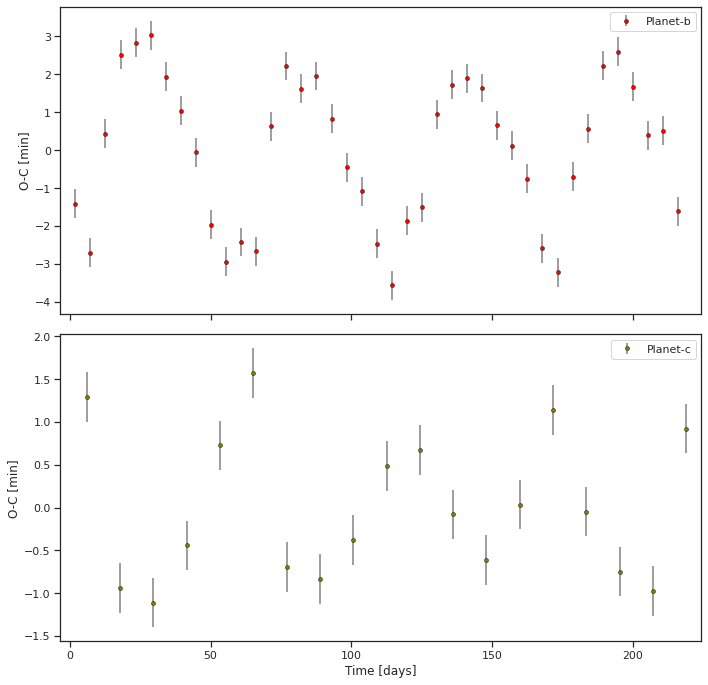

In [14]:
nauplot = nau.Plots(PS)  # Call the module by passing the Planetary System object

# Plot TTVs!
nauplot.TTVs(residuals=False); # Don't make space for residuals

## 2.3 Preparing for simulations

From the summary of our Planetary System, we see at the bottom part the simulation attributes that Nauyaca automatically calculates based on the provided information of the planets. These attributes are:

* **t0:** It is the reference time at which all the osculating elements found by Nauyaca will be referenced. By default, this number is automatically calculated by rounding down the smallest transit time found in the planet ephemerids. 

* **ftime:** It defines the maximum time of the simulations. By default, it is calculated automatically by rounding up the greatest central time found in the planet ephemeris. If you define a lower value than the calculated by default, then, all the central transit times greater than this new  number will be discarted (for all the planets) and the fitting will be performed until this new final time is reached in the simulations.

* **dt:** This is the timestep of the simulations. By default, it is calculated by dividing the period of the inner planet over 30, which represent the 3.33% of the orbital period of the inner planet. Note that a timestep lower than 5% of internal planet period is suggested to reach a good accuracy in the simulations (Deck et al., 2014)


Let's see these attributes automatically calculated in our system:

In [15]:
print(f"t0: {PS.t0}  [days]")
print(f"ftime: {PS.ftime}  [days]")
print(f"dt: {PS.dt}  [days]")

t0: 1.0  [days]
ftime: 220.0  [days]
dt: 0.17846226666666684  [days]


For the purposes of this tutorial, let's change these parameters and let's see again the updated attributes in the planetary system

In [16]:
# Setting the simulation attributes
PS.simulation(t0=0.0, ftime=221, dt=0.18)

print(f"t0: {PS.t0}  [days]")
print(f"ftime: {PS.ftime}  [days]")
print(f"dt: {PS.dt}  [days]")

t0: 0.0  [days]
ftime: 221  [days]
dt: 0.18  [days]


Nice! It appears that it is all ready to begin the simulations. But before, a **very important** step...

## 2.4 Saving the Planetary System

Once we have our Planetary System, it is very important to save the object. It can help us to avoid writting all the code above to define Planets and the Planetary System again, each time we want to work with it. It is also a good form to make it portable if you want to run another simulation in another computer in another time.

Nauyaca have currently two formats to save the Planetary System object:

* **pickle:** 

$Advantages:$ Fast reconstruction of the Planetary object; small file size. 

$Disadvantages:$ machine-readable only; it is propense to fail if you try to read it with a different Nauyaca version; probably will be deprecated in upcoming versions.

* **json:** 

$Advantages:$ Human readable format; no conflicts with Nauyaca versions. 

$Disadvantages:$ Larger file size than pickle format; could fail if trying to save non-serializable objects (difficult to occur in Nauyaca).


Each one of them have advantages and disadvantages. Thus, we recommend saving in **both** formats with the aim of having a backup of the studied planetary system.


We save our system in these formats by doing:

In [17]:
PS.save_pickle()  # Save in pickle format

--> Pickle file ./SystemX.pkl saved


In [18]:
PS.save_json()   # Save in json format

--> JSON file ./SystemX.json saved


which by default, will be saved with the name of the Planetary System. These files are saved in the working directory.

#### In the next tutorial, we wil see how to use these files to rebuild the Planetary System defined here. See you there!

________________________________________